In [12]:
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

# Importing csv files and merging for summary data

city_data = pd.read_csv('city_data.csv')
ride_data = pd.read_csv('ride_data.csv')

summary_data = pd.merge(city_data, ride_data, how = 'left', left_on = 'city', right_on = 'city')

#city_data.head()
#ride_data.head()
#summary_data.head()

,city,driver_count,type,date,fare,ride_id
0,Richardfort,38,Urban,2018-02-24 08:40:38,13.93,5628545007794
1,Richardfort,38,Urban,2018-02-13 12:46:07,14.00,910050116494
2,Richardfort,38,Urban,2018-02-16 13:52:19,17.92,820639054416
3,Richardfort,38,Urban,2018-02-01 20:18:28,10.26,9554935945413
4,Richardfort,38,Urban,2018-04-17 02:26:37,23.00,720020655850


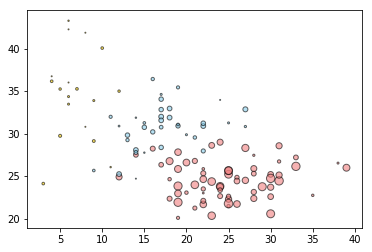

In [23]:
# X axis is total number of rides
# Y axis is average fair
# Bubble size is number of drivers per city

# Creating city type

urban_city = summary_data.loc[summary_data['type'] == 'Urban']
suburban_city = summary_data.loc[summary_data['type'] == 'Suburban']
rural_city = summary_data.loc[summary_data['type'] == 'Rural']

# Finding ride count by ride_id for city type 

urban_rides = urban_city.groupby(["city"]).count()["ride_id"]
urban_fare = urban_city.groupby(["city"]).mean()["fare"]
urban_drivers = urban_city.groupby(["city"]).mean()["driver_count"]

suburban_rides = suburban_city.groupby(["city"]).count()["ride_id"]
suburban_fare = suburban_city.groupby(["city"]).mean()["fare"]
suburban_drivers = suburban_city.groupby(["city"]).mean()["driver_count"]

rural_rides = rural_city.groupby(["city"]).count()["ride_id"]
rural_fare = rural_city.groupby(["city"]).mean()["fare"]
rural_drivers = rural_city.groupby(["city"]).mean()["driver_count"]

#Setting bubble plot parameters

plt.scatter(urban_rides, urban_fare, s=urban_drivers, c='lightcoral', marker='o', alpha= '.6', edgecolor='black', label='Urban')
plt.scatter(suburban_rides, suburban_fare, s=suburban_drivers, c='skyblue', marker='o', alpha= '.6', edgecolor='black', label='Suburban')
plt.scatter(rural_rides, rural_fare, s=rural_drivers, c='gold', marker='o', alpha= '.6', edgecolor='black', label='Rural')

plt.show()

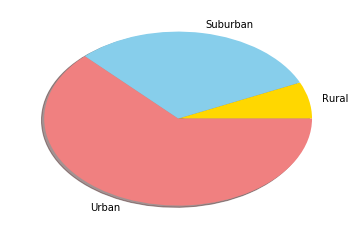

In [21]:
# Pie chart for total fares by city type

city_type_percent = summary_data.groupby(['type']).sum()['fare'] / summary_data['fare'].sum()
plt.pie(city_type_percent, labels=["Rural", "Suburban", "Urban"], colors=["gold", "skyblue", 'lightcoral'], shadow= True)

plt.show()